# Kmeans

* Este Jupyter tem como função treinar um `Kmeans` e verificar incialmente se é possível classificar a partir de uma abordagem não supervisionada.
* Treina com uma busca otimizada de parâmetros

Importando as bibliotecas

In [1]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans

from modules.best_params import best_params

----

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
dados = pd.read_csv('dados.csv')

In [4]:
dados.sample()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1285,26,20,110,45,6,-45,259,63,-214,-124,...,-59,51,8,-2,51,63,-199,-62,-101,98


Transformando os dados para um array do numpy para conseguir gerar os gráficos (N rola em df). 

In [10]:
np_df = dados.to_numpy()

Iniciando um modelo simples com apenas dois clusters que é o que queremos saber a princípio (se tem ou não tem fadiga muscular).

In [6]:
kmeans = KMeans(init="random",  n_clusters=2,  n_init=10, random_state=7)

Treinando o modelo

In [7]:
kmeans.fit(dados)

KMeans(init='random', n_clusters=2, random_state=7)

Obtendo os centroides dos clusters

In [8]:
centers = kmeans.cluster_centers_
centers

array([[  2.82753623,   3.59710145,   6.37753623, ...,   7.30797101,
          1.31666667,   4.35724638],
       [170.        , 168.95652174, 171.2173913 , ..., 168.75      ,
        168.08695652, 169.68478261]])

O gráfico abaixo mostra onde o modelo posicionou os centroides dos clusters do modelo com 2 clusters.

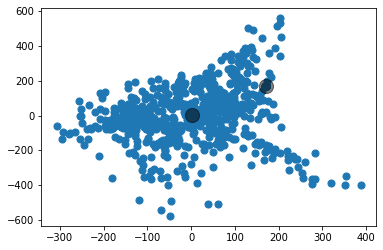

In [11]:
plt.scatter(np_df[:, 0], np_df[:, 1],s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Descobrindo os melhores parâmetros para o modelo.
Vamos usar o Random Search no lugar do Grid Search

In [47]:
values = {'init':['k-means++', 'random'], 'algorithm': ['elkan', 'auto', 'full']}

In [48]:
clf = KMeans(n_clusters=2, random_state=7)

In [49]:
%%time

try:
    best, random_clf = best_params(values, clf, np_df, 300)

except Exception as error:
    logger.warning('Aconteceu algum problema...')
    logger.critical(error)

else:
    logger.info('Ok')
    
finally:
    logger.info('Busca finalizada')

/home/saraselis/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=300. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
 {'cv': None, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__copy_x': True, 'estimator__init': 'k-means++', 'estimator__max_iter': 300, 'estimator__n_clusters': 2, 'estimator__n_init': 10, 'estimator__random_state': 7, 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator': KMeans(n_clusters=2, random_state=7), 'n_iter': 300, 'n_jobs': None, 'param_distributions': {'init': ['k-means++', 'random'], 'algorithm': ['elkan', 'auto', 'full']}, 'pre_dispatch': '2*n_jobs', 'random_state': None, 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 1}
 {'init': 'random', 'algorithm': 'elkan'}
CPU times: user 3min 37s, sys: 2min 20s, total: 5min 57s
Wall time: 29.5 s


In [50]:
best

{'init': 'random', 'algorithm': 'elkan'}

{'init': 'random', 'algorithm': 'elkan'}

Utilizando o método do cotovelo para tentar descobrir qual a melhor quantidade de clusters para o modelo.

-> minimizar a inércia

In [51]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='random', algorithm='elkan', random_state=7)
    kmeans.fit(np_df)
    wcss.append(kmeans.inertia_)

/home/saraselis/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(


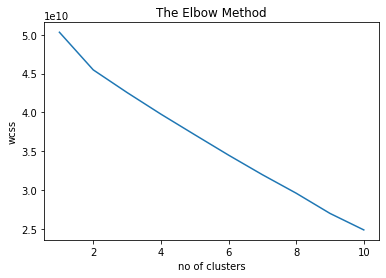

In [52]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
kmeans.inertia_

24850499665.086216

# 😩

Teste com 5 clusters

In [54]:
kmeans = KMeans(init="random",  n_clusters=5, algorithm='elkan', random_state=7)

In [55]:
y_kmeans = kmeans.fit_predict(dados)

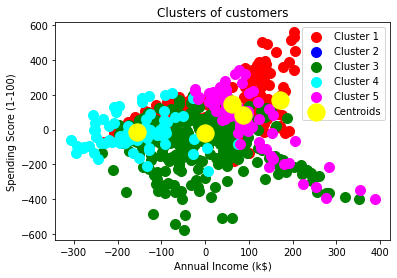

In [56]:
plt.scatter(np_df[y_kmeans == 0, 0], np_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np_df[y_kmeans == 1, 0], np_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(np_df[y_kmeans == 2, 0], np_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(np_df[y_kmeans == 3, 0], np_df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(np_df[y_kmeans == 4, 0], np_df[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabbel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Podemos observar que os clusters se sobrepoem bastante, o modelo não está conseguindo realizar a separação dos dados.